# Store US Stock Prices in HDF5 Format

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load source data

In [9]:
# Load the data from de CSV file
data = pd.read_csv('WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv')

## Apply required transformations

In [10]:
# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Select stock price data only from the year 2000 onwards
data = data[data['date'].dt.year >= 2000]

# Set 'ticker' and 'date' as index
data.set_index(['ticker', 'date'], inplace=True)

# Keep only the adjusted open, low, high, close, and volume (OHLCV) prices, 
# and rename by removing the 'adj_' prefix
data = data[['adj_open', 'adj_low', 'adj_high', 'adj_close', 'adj_volume']]
data.columns = ['open', 'low', 'high', 'close', 'volume']

data

open        low       high      close     volume
ticker date                                                             
A      2000-01-03  53.726454  45.969377  53.856080  49.121329  3343600.0
       2000-01-04  46.481058  44.175084  46.992738  45.369006  3408500.0
       2000-01-05  45.198445  41.828176  45.239380  41.998737  4119200.0
       2000-01-06  42.046493  39.658651  42.298923  40.934441  1812900.0
       2000-01-07  40.293135  40.252200  44.986951  44.345645  2016900.0
...                      ...        ...        ...        ...        ...
ZUMZ   2018-03-21  23.800000  23.605800  24.600000  23.950000   354092.0
       2018-03-22  23.900000  23.300000  24.350000  23.350000   269607.0
       2018-03-23  23.550000  23.450000  24.200000  23.550000   301584.0
       2018-03-26  23.750000  23.700000  24.800000  24.650000   375320.0
       2018-03-27  24.650000  23.350000  24.650000  23.600000   403884.0

[11343920 rows x 5 columns]

## Plot data

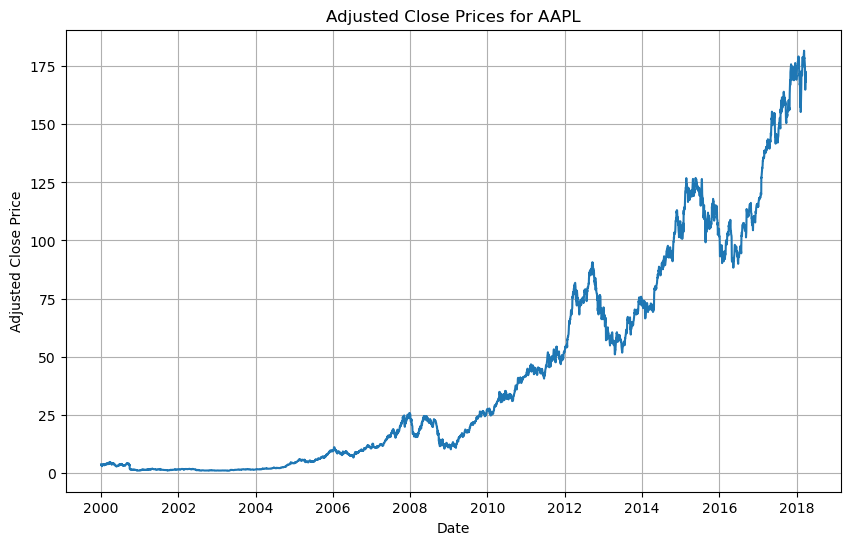

In [12]:
# Select a specific ticker to plot
ticker = 'AAPL'
ticker_data = data.loc[ticker]

# Plot the adjusted close prices
plt.figure(figsize=(10, 6))
plt.plot(ticker_data.index, ticker_data['close'])
plt.title(f'Adjusted Close Prices for {ticker}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


## Store in HDF5 format

In [13]:
# Save the data in HDF5 format
hdf5_file_path = 'us_stocks.h5'
data.to_hdf(hdf5_file_path, key='us_stocks', mode='w')